In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

In [6]:
df = pd.read_csv('instagram_reach.csv')    

In [7]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
## seeing if any null values

df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [23]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


<AxesSubplot:xlabel='Followers', ylabel='Count'>

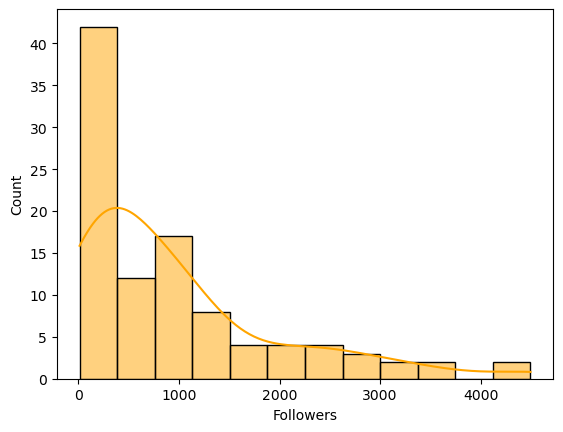

In [29]:
sns.histplot(data=df,x='Followers',color='orange',kde=True)

In [31]:
df.corr()

#we cant find correlation bewteen hashtags and followers if any

C:\Users\91951\AppData\Local\Temp\ipykernel_16812\1739550813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,S.No,Followers,Likes
Unnamed: 0,1.000000,0.869163,0.208473,0.010271
S.No,0.869163,1.000000,0.172002,0.009721
Followers,0.208473,0.172002,1.000000,0.266218
Likes,0.010271,0.009721,0.266218,1.000000


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['USERNAME']=le.fit_transform(df['USERNAME'])
df['Caption']=le.fit_transform(df['Caption'])
df['Hashtags']=le.fit_transform(df['Hashtags'])


In [35]:
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(int)

In [36]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,64,86,1600,17,11,139
1,1,2,29,82,880,97,2,23
2,2,3,3,13,255,87,2,25
3,3,4,71,89,340,65,3,49
4,4,5,23,30,304,64,3,30


In [45]:
df.corr()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
Unnamed: 0,1.000000,0.869163,0.027918,-0.009990,0.208473,-0.199831,0.017372,0.010271
S.No,0.869163,1.000000,0.091747,-0.020228,0.172002,-0.154111,-0.110024,0.009721
USERNAME,0.027918,0.091747,1.000000,0.116984,0.038313,-0.028755,0.003452,0.036248
Caption,-0.009990,-0.020228,0.116984,1.000000,-0.077419,0.000373,0.065566,0.166455
Followers,0.208473,0.172002,0.038313,-0.077419,1.000000,-0.037358,0.251154,0.266218
Hashtags,-0.199831,-0.154111,-0.028755,0.000373,-0.037358,1.000000,-0.041079,0.155402
Time since posted,0.017372,-0.110024,0.003452,0.065566,0.251154,-0.041079,1.000000,0.609888
Likes,0.010271,0.009721,0.036248,0.166455,0.266218,0.155402,0.609888,1.000000


<AxesSubplot:xlabel='Time since posted', ylabel='Followers'>

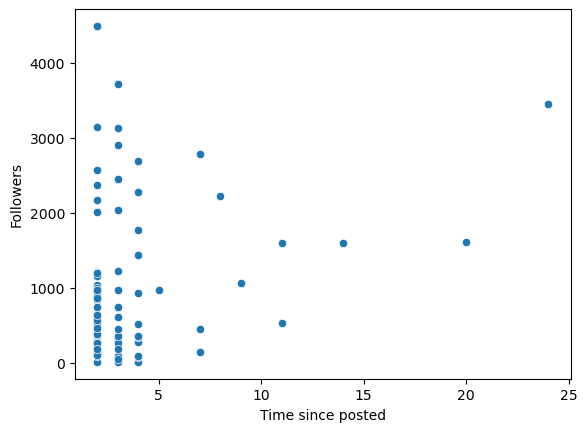

In [50]:
sns.scatterplot(data=df,y='Followers',x='Time since posted')

#hence we see some correlation bewteen time since posted and followers 

In [52]:
X=df.drop(labels=['S.No','Time since posted','Likes'],axis=1)

In [53]:
y = df[['Time since posted','Likes']]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [68]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [74]:
def result(model,Xtrain,Xtest,ytrain,ytest):
    model.fit(Xtrain,ytrain)
    pred = model.predict(Xtest)
    r2 = r2_score(y_true=ytest,y_pred=pred)
    mae=mean_absolute_error(y_true=ytest,y_pred=pred)
    mse=mean_squared_error(y_true=ytest,y_pred=pred)
    
    
    return r2,mae,mse

In [88]:
r2,mae,mse = result(model=RandomForestClassifier(),
       Xtrain=X_train,
       Xtest=X_test,
       ytrain=y_train,
       ytest=y_test)

print(f'r2 {r2}')
print(f'mae {mae}')
print(f'mse {mse}')

r2 -0.3298351595279376
mae 28.12
mse 4203.36


In [85]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([[  2,  16],
       [  2, 273],
       [  2,  20],
       [  2,  31],
       [  2,  24],
       [  3,  33],
       [  2,  17],
       [  4,  25],
       [  2,  31],
       [  2,  19],
       [  2,  86],
       [  4,  43],
       [  2,  31],
       [  2,  31],
       [  2,  19],
       [  2,  20],
       [  2,  16],
       [  2,  10],
       [  2,  19],
       [  2,  20],
       [  2,  16],
       [  2,  16],
       [  2,  48],
       [  2, 119],
       [  3,  20]], dtype=int64)